In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [2]:
x = pd.read_csv(
    r'C:\Users\user\adult.train.txt',
    header=None,
    names=['age', 'workclass', 'fnlwgt', 'education', 
           'education-num', 'marital-status', 'occupation',
           'relationship','race','sex','capital-gain',
           'capital-loss','hours-per-week','native-country','income']
)

y = pd.read_csv(
    r'C:\Users\user\adult.test.txt',
    header=None,
    names=['age', 'workclass', 'fnlwgt', 'education', 
           'education-num', 'marital-status', 'occupation',
           'relationship','race','sex','capital-gain',
           'capital-loss','hours-per-week','native-country','income']
)


In [3]:
#nan or ？　data processing
for i in x.columns:
    x[i].replace(' ?', inplace=True)
    x[i].replace('Unknown', inplace=True)
    
for i in y.columns:
    y[i].replace(' ?', inplace=True)
    y[i].replace('Unknown', inplace=True)

In [4]:
#remove column
x.drop('fnlwgt', axis=1, inplace=True)
x.drop('education-num', axis=1, inplace=True)
x.drop('relationship', axis=1, inplace=True)
x.drop('native-country', axis=1, inplace=True)
x.drop('marital-status', axis=1, inplace=True)

y.drop('fnlwgt', axis=1, inplace=True)
y.drop('education-num', axis=1, inplace=True)
y.drop('relationship', axis=1, inplace=True)
y.drop('native-country', axis=1, inplace=True)
y.drop('marital-status', axis=1, inplace=True)

In [5]:
#onehot encoding
labelencoder = LabelEncoder()
data_le=pd.DataFrame(x)
data_le['workclass'] = labelencoder.fit_transform(x['workclass'])
data_le['education'] = labelencoder.fit_transform(x['education'])
data_le['occupation'] = labelencoder.fit_transform(x['occupation'])
data_le['race'] = labelencoder.fit_transform(x['race'])
data_le['sex'] = labelencoder.fit_transform(x['sex'])
data_le['capital-gain'] = labelencoder.fit_transform(x['capital-gain'])
data_le['capital-loss'] = labelencoder.fit_transform(x['capital-loss'])
data_le['hours-per-week'] = labelencoder.fit_transform(x['hours-per-week'])
data_le['income'] = labelencoder.fit_transform(x['income'])
#----
labelencoder = LabelEncoder()
data_ley=pd.DataFrame(y)
data_ley['workclass'] = labelencoder.fit_transform(y['workclass'])
data_ley['education'] = labelencoder.fit_transform(y['education'])
data_ley['occupation'] = labelencoder.fit_transform(y['occupation'])
data_ley['race'] = labelencoder.fit_transform(y['race'])
data_ley['sex'] = labelencoder.fit_transform(y['sex'])
data_ley['capital-gain'] = labelencoder.fit_transform(y['capital-gain'])
data_ley['capital-loss'] = labelencoder.fit_transform(y['capital-loss'])
data_ley['hours-per-week'] = labelencoder.fit_transform(y['hours-per-week'])
data_ley['income'] = labelencoder.fit_transform(y['income'])
    

In [6]:
#x_train.txt , y_test.txt
#train
X=x
X1=x['hours-per-week']

#test
Y=y
Y1=y['hours-per-week']


# data

In [7]:
x_train=np.array(X)#32561,10

y_train=np.array(X1)#32561      column atrribute 

x_test=np.array(Y)#16281,10

y_test=np.array(Y1)#16281 column


# rmse mape

In [8]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import  mean_absolute_error

In [9]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
#MAPE:範圍[0,+∞)，MAPE 爲0%表示完美模型，MAPE 大於 100 %則表示劣質模型。MAPE 的值越小，說明預測模型擁有更好的精確度.


In [10]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

# svr

In [11]:
from sklearn.svm import SVR

In [12]:
linear_svr = SVR(kernel="linear", C=1e3, gamma=0.1)

In [13]:
# train data
linear_svr.fit(x_train, y_train)

SVR(C=1000.0, gamma=0.1, kernel='linear')

In [14]:
#score test
linear_svr.score(x_test,y_test)

0.9999937941763316

In [15]:
#score train
linear_svr.score(x_train,y_train)

0.9999937887921201

In [16]:
#預測結果
linear_svr_y_predict = linear_svr.predict(x_test)

In [17]:
print("mape",mean_absolute_percentage_error(linear_svr_y_predict,y_test))

mape 0.16094392698474413


In [18]:
SVR_mape=mean_absolute_percentage_error(linear_svr_y_predict,y_test)

In [19]:
print("rmse",rmse(y_test,linear_svr_y_predict))

rmse 0.030503525315161744


In [20]:
SVR_rmse=rmse(y_test,linear_svr_y_predict)

In [21]:
#print(np.sqrt(mean_squared_error(y_test, linear_svr_y_predict)))

# RF

In [22]:
from sklearn.ensemble import RandomForestClassifier


In [23]:
rf = RandomForestClassifier(max_depth=4, random_state=0)

In [24]:
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=4, random_state=0)

In [25]:
rf.score(x_train,y_train)

0.6296796781425632

In [26]:
rf.score(x_test,y_test)

0.6257600884466556

In [27]:
rf_pred=rf.predict(x_test)

In [28]:
print("mape",mean_absolute_percentage_error(rf_pred,y_test))

mape 11.67581241634285


In [29]:
RF_mape=mean_absolute_percentage_error(rf_pred,y_test)/100

In [30]:
print("rmse",rmse(y_test,rf_pred))

rmse 9.597229372110881


In [31]:
RF_rmse=rmse(y_test,rf_pred)/100

# xgboost

In [32]:
import xgboost as xgb

In [33]:
xgb_model =xgb.XGBRegressor(objective="reg:linear", random_state=0)

In [34]:
xgb_model.fit(x_train,y_train)

[23:56:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[23:56:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [35]:
y_pred = xgb_model.predict(x_test)
XG_mape=mean_absolute_percentage_error(y_pred,y_test)

In [36]:
print("mape",XG_mape)

mape 0.04538023182823856


In [37]:
XG_rsme= rmse(y_test,y_pred)

In [38]:
print("rmse",XG_rsme)

rmse 0.02008676036477009


# NN

In [39]:
from sklearn.neural_network import MLPClassifier

In [40]:
clf = MLPClassifier(solver='lbfgs',
                     hidden_layer_sizes=(5, 2), random_state=42)

In [41]:
 clf.fit(X, X1)

MLPClassifier(hidden_layer_sizes=(5, 2), random_state=42, solver='lbfgs')

In [42]:
clfe=clf.predict(Y)

In [43]:
clfe

array([39, 39, 39, ..., 39, 39, 39], dtype=int64)

In [44]:
print("mape",mean_absolute_percentage_error(clfe,Y1))
NN_mape=mean_absolute_percentage_error(clfe,Y1)/100

mape 18.951459858038078


In [45]:
error=(clfe-Y1)**2

In [46]:
er=np.array(error)

In [47]:
NNrmse=np.sqrt(er).mean()
NN_rmse=NNrmse/100

In [48]:
print('rmse',NNrmse)

rmse 7.39106934463485


# -----

In [80]:
P= ['SVR', 'RF', 'XGBOOST', 'NN']
com_mape=[SVR_mape,RF_mape,XG_mape,NN_mape]
com_rmse=[SVR_rmse,RF_rmse,XG_rsme,NN_rmse]
PC=[com_mape,com_rmse]
cc=['mape','rmse']

In [84]:
df2 = pd.DataFrame(PC,
                   columns=['SVR', 'RF', 'XGBOOST', 'NN'] )
df2.index=['mape','rmse']

In [85]:
df2

,SVR,RF,XGBOOST,NN
mape,0.160944,0.116758,0.045380,0.189515
rmse,0.030504,0.095972,0.020087,0.073911


# --

In [49]:
import matplotlib.pyplot as plt
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split


from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 8, 5

Text(0, 0.5, 'num')

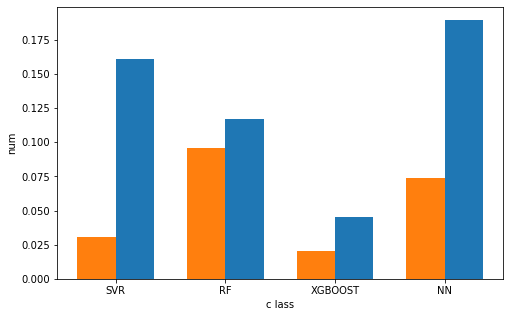

In [50]:
import matplotlib.pyplot as plt
P= ['SVR', 'RF', 'XGBOOST', 'NN']
class_a_mape = [SVR_mape,RF_mape,XG_mape,NN_mape]
class_b_rmse = [SVR_rmse,RF_rmse,XG_rsme,NN_rmse]

plt.bar(P, class_a_mape, label = 'class_a_mape', align = "edge", width = 0.35)

plt.bar(P, class_b_rmse, label = 'class_b_rmse', align = "edge", width = -0.35)

plt.xlabel('c lass')
plt.ylabel('num')